# Masters' in Applied Artificial Intelligence
## Machine Learning Algorithms Course

Notebooks for MLA course

by [*lufer*](mailto:lufer@ipca.pt)

(2024)

---



# ML Modelling - Part III

**Contents**:

1.  Spliting Datasets
2.  Data Correlation
3.  **More Dataset Analysis**
4.  **Feature Scalling**
5.  ...


##0 - Environment preparation


### Importing necessary Libraries

In [ ]:
#!pip install pandas-profiling # set of libraries for output

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#from pandas_profiling import ProfileRepor   #see https://www.kaggle.com/discussions/general/233785
from scipy import stats

Mounting Drive

In [3]:

from google.colab import drive

# it will ask for your google drive credentiaals
drive.mount('/content/gDrive/', force_remount=True)

Mounted at /content/gDrive/


In [4]:
#import os
#print(os.getcwd())


/content


## 1 - Features Scalling

###1.1 - Normalization

In [8]:
filePath='/content/gDrive/MyDrive/Colab Notebooks/MIA - ML - 2024-2025/Datasets/'
cs = pd.read_csv(filePath+"car_sales.csv")
pd.set_option("display.precision", 2)
print("Loaded")

Loaded


In [9]:
cs.head()

,Make,Colour,Odometer,Doors,Price
0,Toyota,White,150043.0,4.0,"$4,000"
1,Honda,Red,87899.0,4.0,"$5,000"
2,Toyota,Blue,NaN,3.0,"$7,000"
3,BMW,Black,11179.0,5.0,"$22,000"
4,Nissan,White,213095.0,4.0,"$3,500"


In [20]:
# Remove non numerical columns
cs_numerical = cs.drop(['Make','Colour'],axis=1)
cs_numerical

,Odometer,Doors,Price
0,150043.0,4.0,"$4,000"
1,87899.0,4.0,"$5,000"
2,NaN,3.0,"$7,000"
3,11179.0,5.0,"$22,000"
4,213095.0,4.0,"$3,500"
5,NaN,4.0,"$4,500"
6,NaN,4.0,"$7,500"
7,NaN,4.0,NaN
8,60000.0,NaN,NaN
9,31600.0,4.0,"$9,700"


In [11]:
cs_numerical.describe()

,Odometer,Doors
count,6.00,9.0
mean,92302.67,4.0
std,76489.81,0.5
min,11179.00,3.0
25%,38700.00,4.0
50%,73949.50,4.0
75%,134507.00,4.0
max,213095.00,5.0


In [23]:
# First, split the dataset

from sklearn.model_selection import train_test_split

# Convert any column to numerical

#Split into X/y
X=cs_numerical.drop("Price", axis=1)
y=cs_numerical['Price']

#Split into to trainnig and test dataset

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,random_state=40)

X_train.describe()
#X_test.describe()


,Odometer,Doors
count,4.00,7.00
mean,82385.50,3.86
std,50623.49,0.38
min,31600.00,3.00
25%,52900.00,4.00
50%,73949.50,4.00
75%,103435.00,4.00
max,150043.00,4.00


 We can see that there is a huge difference in the range of train values (min: 31600 and max: 150043)

In [15]:
# try to normalize with sklearn
from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data
norm = MinMaxScaler()
d = norm.fit_transform(X_train)
X_train_norm = pd.DataFrame(d, columns=X_train.columns)


In [16]:
X_train_norm

,Odometer,Doors
0,0.24,NaN
1,0.48,1.0
2,NaN,0.0
3,0.00,1.0
4,1.00,1.0
5,NaN,1.0
6,NaN,1.0
7,NaN,1.0


All the features now have a minimum value of 0 and a maximum value of 1

In [24]:
X_train_norm.describe()

,Odometer,Doors
count,4.00,7.00
mean,0.43,0.86
std,0.43,0.38
min,0.00,0.00
25%,0.18,1.00
50%,0.36,1.00
75%,0.61,1.00
max,1.00,1.00


No big discrepancies now amount all the metrics!

---





###1.2 - Standardization

**Attention:**
*   One-Hot encoded features are already in the range between 0 to 1. So, normalization would not affect their value.
*   Only applied standardization to the numerical columns, not the other One-Hot Encoded features.


In [18]:
X_train.describe()

,Odometer,Doors
count,4.00,7.00
mean,82385.50,3.86
std,50623.49,0.38
min,31600.00,3.00
25%,52900.00,4.00
50%,73949.50,4.00
75%,103435.00,4.00
max,150043.00,4.00


In [25]:
# data standardization with  sklearn
from sklearn.preprocessing import StandardScaler

In [26]:
X_train.head()

,Odometer,Doors
8,60000.0,NaN
1,87899.0,4.0
2,NaN,3.0
9,31600.0,4.0
0,150043.0,4.0


In [28]:
# copy of datasets
X_train_stand = X_train.copy()
X_test_stand = X_test.copy()

# Only applied standardization to the numerical columns
# numerical features
num_cols = ['Odometer','Doors']

# apply standardization on numerical features
for i in num_cols:

    # fit on training data column
    scale = StandardScaler().fit(X_train_stand[[i]])

    # transform the training data column
    X_train_stand[i] = scale.transform(X_train_stand[[i]])

    # transform the testing data column
    X_test_stand[i] = scale.transform(X_test_stand[[i]])

X_train_stand.describe()

,Odometer,Doors
count,4.00e+00,7.00e+00
mean,-5.55e-17,-2.54e-16
std,1.15e+00,1.08e+00
min,-1.16e+00,-2.45e+00
25%,-6.73e-01,4.08e-01
50%,-1.92e-01,4.08e-01
75%,4.80e-01,4.08e-01
max,1.54e+00,4.08e-01


In [29]:
X_train_stand.head()

,Odometer,Doors
8,-0.51,NaN
1,0.13,0.41
2,NaN,-2.45
9,-1.16,0.41
0,1.54,0.41


After standardization, numerical features are now centered on the mean with a standard deviation neaar 1!

###1.2 - Comparing Features Scalling

**Original**

In [30]:
X_train.describe()

,Odometer,Doors
count,4.00,7.00
mean,82385.50,3.86
std,50623.49,0.38
min,31600.00,3.00
25%,52900.00,4.00
50%,73949.50,4.00
75%,103435.00,4.00
max,150043.00,4.00


Text(0.5, 1.0, 'Boxplot of Original Odometer Values')

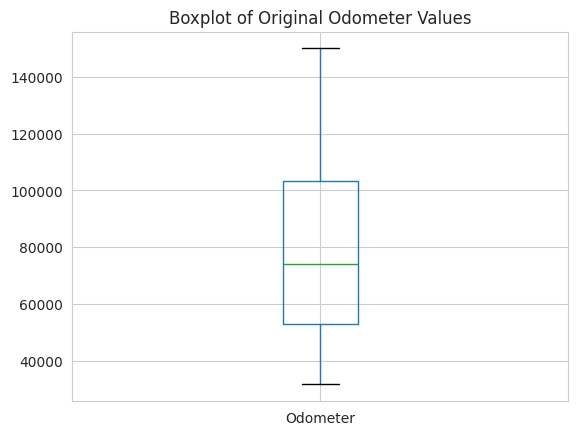

In [40]:

# Draw a vertical boxplot grouped
# by a categorical variable:

#boxplot = X_train.boxplot(column=['Odometer'])
boxplot = X_train.boxplot(column=['Odometer'])
plt.title('Boxplot of Original Odometer Values')

**Interpreting the boxplot:**

*   Bottom black horizontal line of blue box plot is minimum value
*   First horizontal line of rectangle shape of blue box plot is First quartile or 25%
*   Second (green) horizontal line of rectangle shape of blue box plot is the second quartile or 50% or median.
*   Third horizontal line of rectangle shape of blue box plot is third quartile or 75%
*   Top black horizontal line of rectangle shape of blue box plot is maximum value.
*   If there are small diamond shape out the wiskers, they are outlier data or erroneous data


**Standardized dataset**

In [32]:
X_train_stand.head()

,Odometer,Doors
8,-0.51,NaN
1,0.13,0.41
2,NaN,-2.45
9,-1.16,0.41
0,1.54,0.41


In [53]:
X_train.head()

,Odometer,Doors
8,60000.0,NaN
1,87899.0,4.0
2,NaN,3.0
9,31600.0,4.0
0,150043.0,4.0


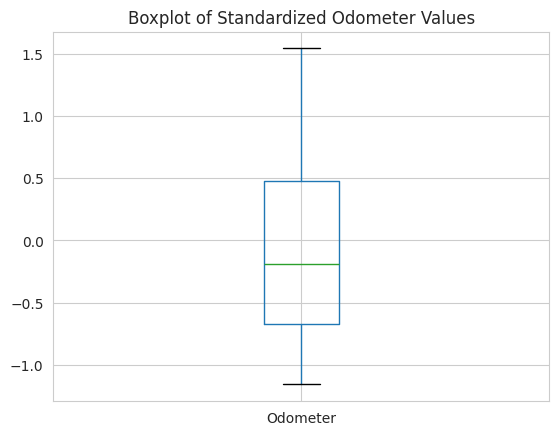

In [35]:

# Draw a vertical boxplot grouped
# by a categorical variable:
#sns.set_style("whitegrid")
#sns.boxplot(x = 'Odometer (KM)', y = 'Price', data = cs.head())

#boxplot = X_train_stand.boxplot(column=['Odometer'])
boxplot = X_train_stand.boxplot(column=['Odometer'])
plt.title('Boxplot of Standardized Odometer Values')

plt.show()

**Normalized Dataset**

In [37]:
X_train_norm.head()

,Odometer,Doors
0,0.24,NaN
1,0.48,1.0
2,NaN,0.0
3,0.00,1.0
4,1.00,1.0


In [38]:
X_train_norm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Odometer  4 non-null      float64
 1   Doors     7 non-null      float64
dtypes: float64(2)
memory usage: 256.0 bytes


Text(0.5, 1.0, 'Boxplot of Normalized Odometer Values')

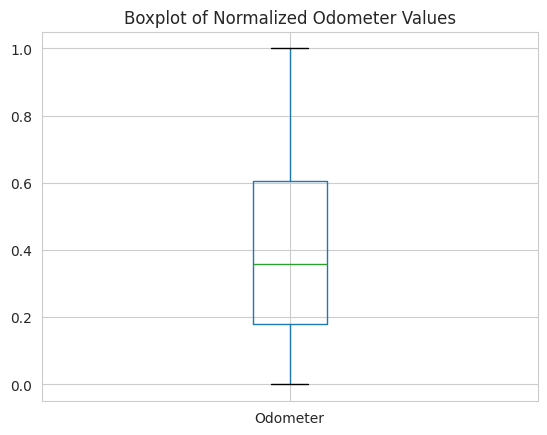

In [47]:

# Draw a vertical boxplot grouped
# by a categorical variable:

boxplot = X_train_norm.boxplot(column=['Odometer'])
plt.title('Boxplot of Normalized Odometer Values')

Comparing both:

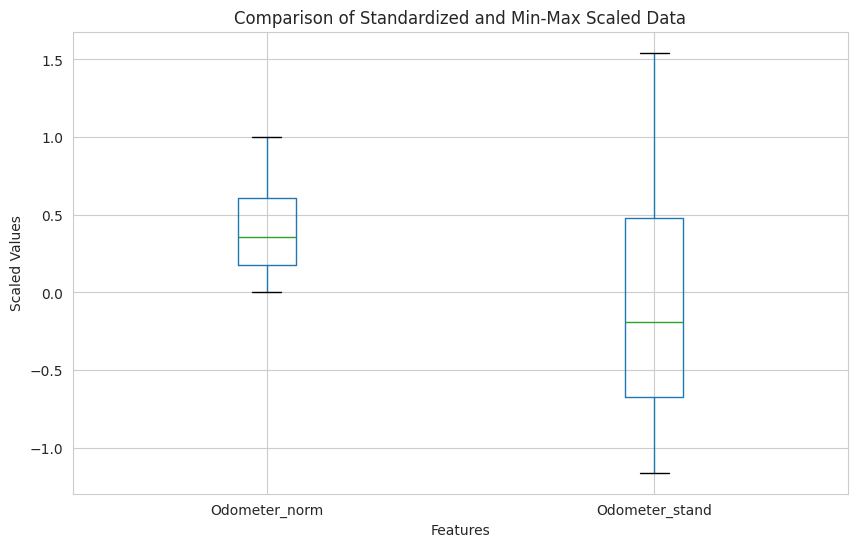

In [58]:
# Combine the scaled DataFrames
combined_df = pd.concat([X_train_norm['Odometer'], X_train_stand['Odometer']], axis=1)
combined_df.columns = [ 'Odometer_norm', 'Odometer_stand']

# Create a boxplot
plt.figure(figsize=(10, 6))
combined_df.boxplot()
plt.title('Comparison of Standardized and Min-Max Scaled Data')
plt.xlabel('Features')
plt.ylabel('Scaled Values')
plt.show()

End!